# Ali Abdullah Ahmad
## CWID - 20031246
## HW02_EDA

In [141]:
import pandas as pd
import numpy as np

1 Load csv file 

In [142]:
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/breast-cancer-wisconsin.csv')

In [143]:
df.head()

Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0  1000025   5   1   1   1   2   1   3   1   1      2
1  1002945   5   4   4   5   7  10   3   2   1      2
2  1015425   3   1   1   1   2   2   3   1   1      2
3  1016277   6   8   8   1   3   4   3   7   1      2
4  1017023   4   1   1   3   2   1   3   1   1      2

I Summarizing each column (e.g. min, max, mean )

In [144]:
df.describe()

Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000    2.000000    1.000000    1.000000    2.000000  
50%      2.000000    3.000000    1.000000    1.000000    2.000000  
75%      4.000000    5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000   10.000000    4.000000

In [145]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

II Identifying missing values

In [146]:
df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

After seeing the report profile F6 has '?' as a missing value which could probably be 6 as all numbers 1-10 are present except for 6, but the asignment tells us to replace the '?' with mean 

In [147]:
df.replace('?', np.nan, inplace=True)

In [148]:
df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

III Replacing the missing values with the “mean” of the column.


In [149]:
df = df.apply(pd.to_numeric, errors='coerce')

In [150]:
df.fillna(df['F6'].mean(), inplace=True)
df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

IV  Displaying the frequency table of “Class” vs. F6

In [151]:
pd.crosstab(df['Class'], df['F6'])

F6     1.000000   2.000000   3.000000   3.544656   4.000000   5.000000   \
Class                                                                     
2            387         21         14         14          6         10   
4             15          9         14          2         13         20   

F6     6.000000   7.000000   8.000000   9.000000   10.000000  
Class                                                         
2              0          1          2          0          3  
4              4          7         19          9        129

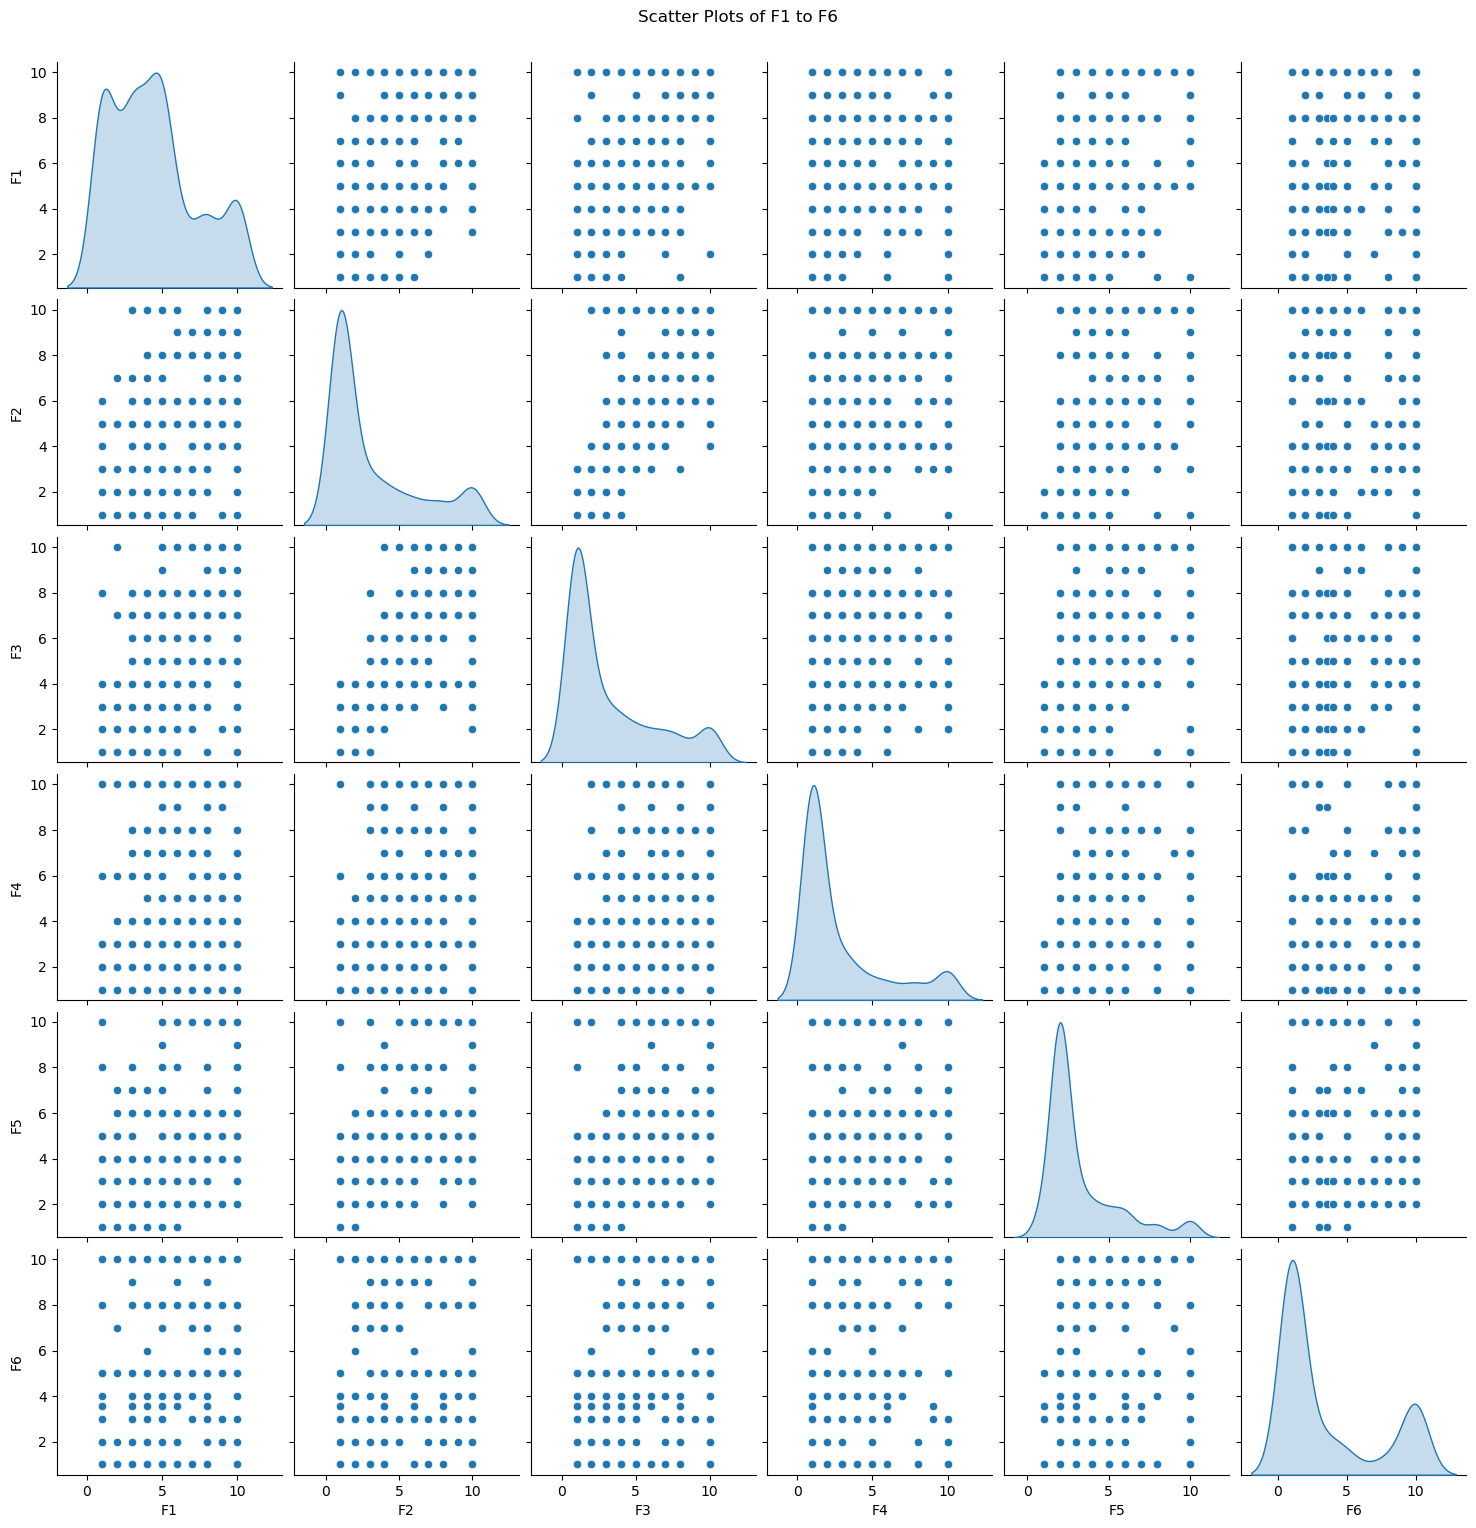

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(df.iloc[:, 1:7], diag_kind='kde')  
plt.suptitle("Scatter Plots of F1 to F6", y=1.02)
plt.show()

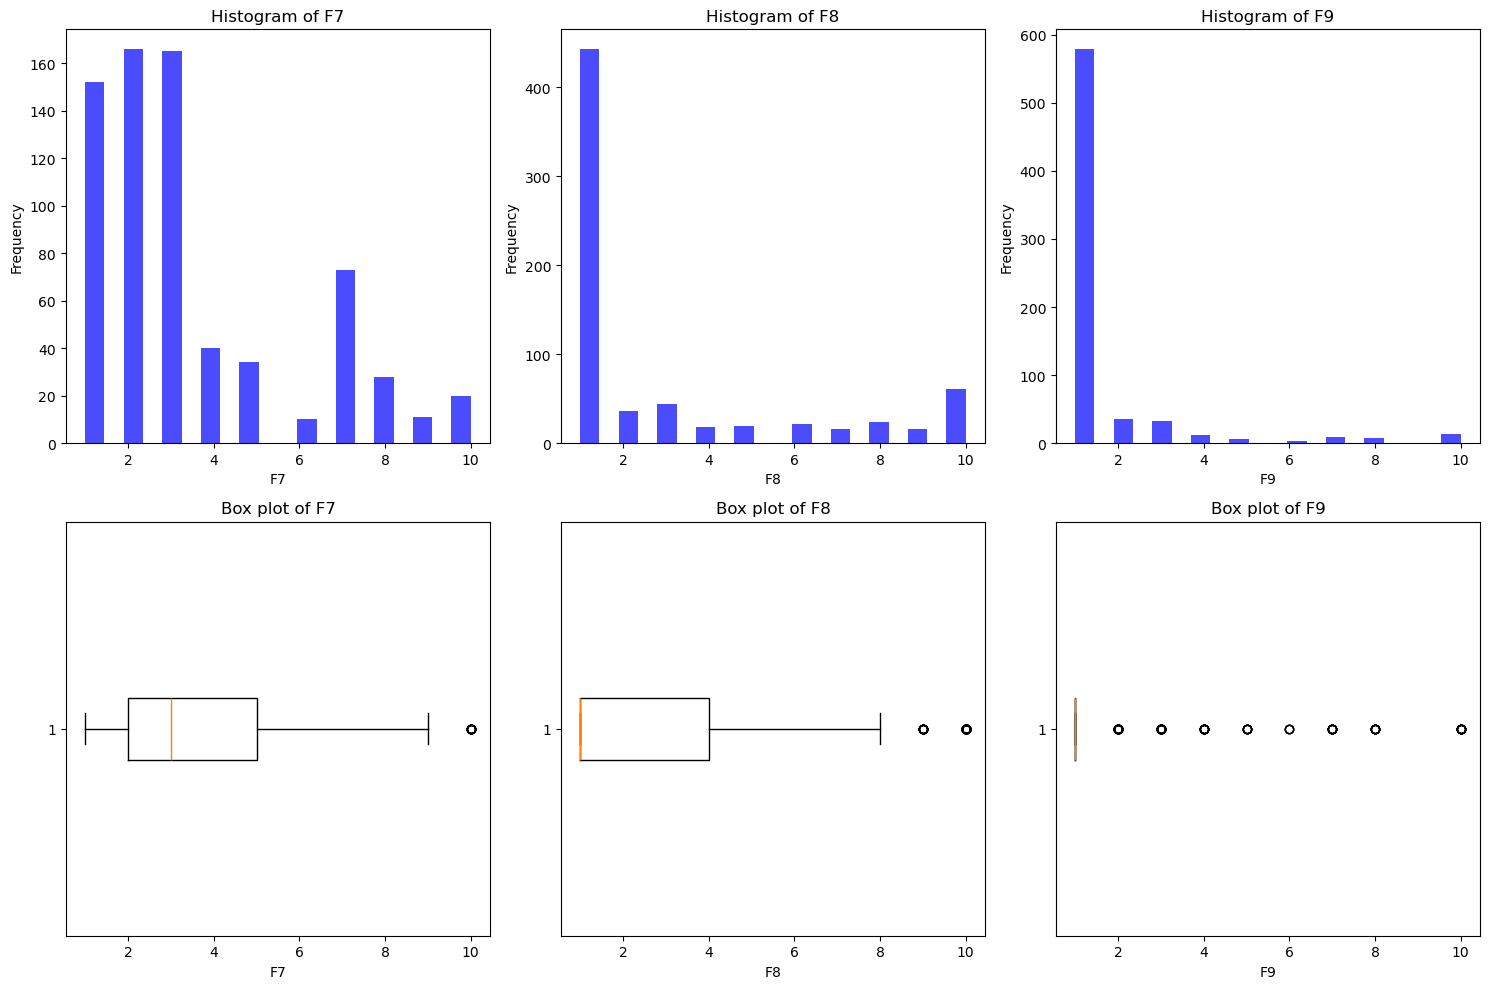

In [153]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

columns = ['F7', 'F8', 'F9']

for i, col in enumerate(columns):
    # Histogram
    axes[0, i].hist(df[col], bins=20, alpha=0.7, color='blue')
    axes[0, i].set_title(f'Histogram of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Box plot
    axes[1, i].boxplot(df[col], vert=False)
    axes[1, i].set_title(f'Box plot of {col}')
    axes[1, i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [154]:
# Delete all variables
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# Collect garbage
import gc
gc.collect()

321160

In [155]:
import pandas as pd
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/breast-cancer-wisconsin.csv')

In [156]:
df.shape

(699, 11)

In [157]:
df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [158]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [159]:
# Drop rows with NaNs in specific columns (e.g., 'F6')
df.dropna(subset=['F6'], inplace=True)
df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [160]:
df.shape

(683, 11)

shape before (699, 11) 
shape after removing any row with a missing value (683, 11)